# Diabetes Prediction

## EDA

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")
df = pd.DataFrame(df)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPG'}, inplace=True)

In [6]:
df.rename(columns={'Outcome': 'Target'}, inplace=True)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#No null values present
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPG              0
Age              0
Target           0
dtype: int64

In [9]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPG              float64
Age                int64
Target             int64
dtype: object

In [10]:
# Dataset is imbalanced
df.Target.value_counts()

Target
0    500
1    268
Name: count, dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#Minimun values in some rows are 0 which is not possible i.e. glucose,skinthickness etc.
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin = df.Insulin.replace(0,df.Insulin.mean())

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

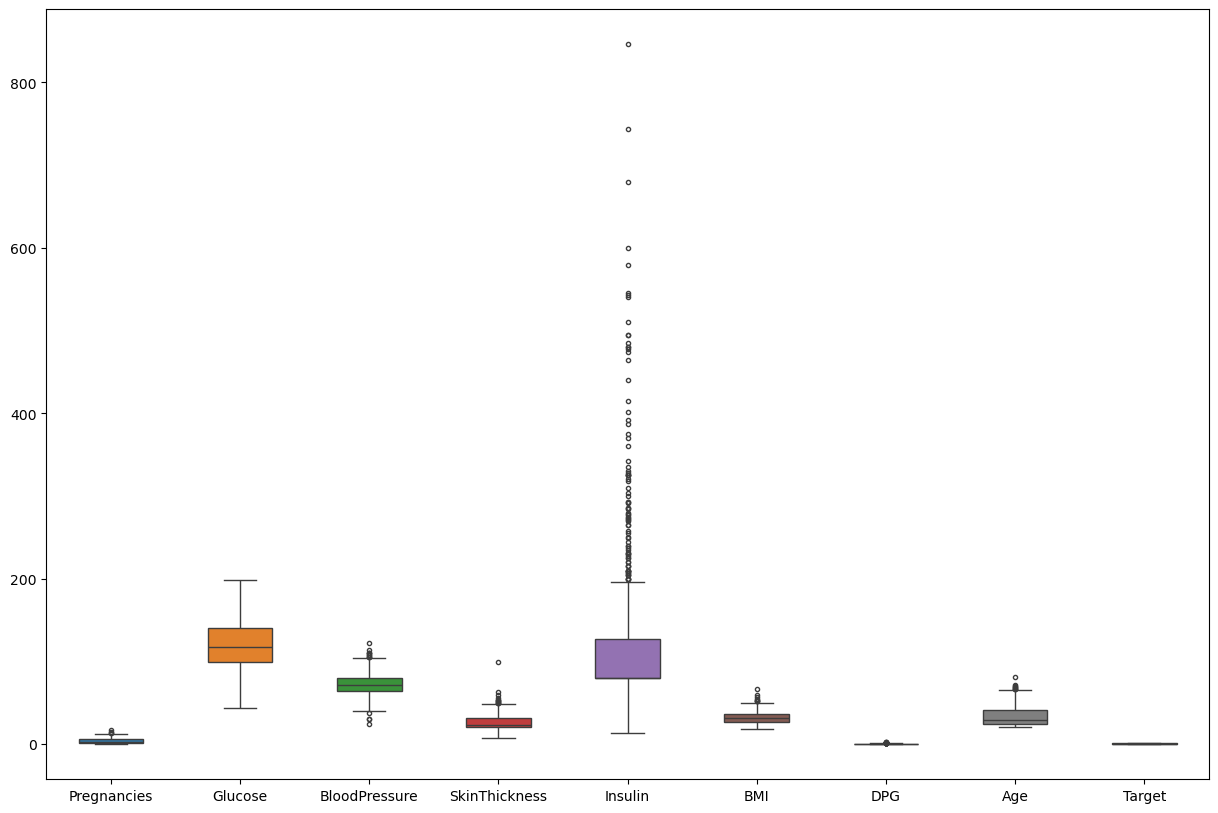

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(df,width=0.5,fliersize=3)

In [15]:
## Insulin and Blood Pressure contain a lot of outliers

In [16]:
#No duplicates found
df[df.duplicated()!=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPG', 'Age', 'Target'],
      dtype='object')

In [18]:
#The dataset is balanced
df[df["Target"]==1].count()

Pregnancies      268
Glucose          268
BloodPressure    268
SkinThickness    268
Insulin          268
BMI              268
DPG              268
Age              268
Target           268
dtype: int64

## Model Training

## Diabetes prediction using :

<Axes: >

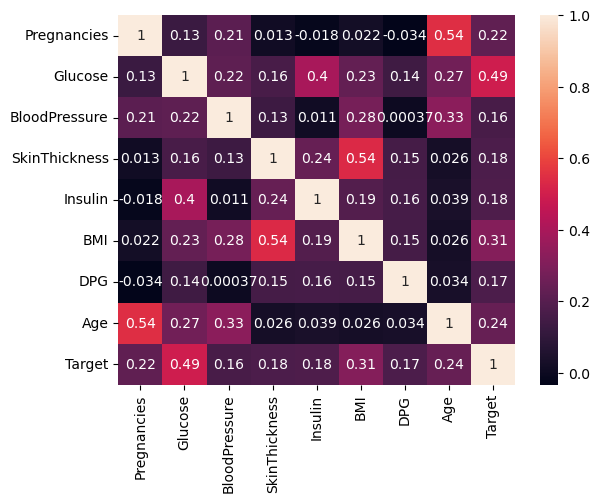

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
# segregate the dependent and independent variable
x = df.iloc[:,:-1]
y = df.Target
x.shape,y.shape

((768, 8), (768,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [114]:
import pickle
from sklearn.preprocessing import StandardScaler
def scaler_standard(x_train,x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)

    file = open(r'C:\Users\dikhe\OneDrive\Desktop\end_project_logistic_R\Model\StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled,x_test_scaled

In [23]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [25]:
#Hyperparameter Tuning
#GridSearch CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
                'penalty':['l1','l2'],
                'C': np.logspace(-3,3,7),
                'solver': ['netwon-cg','lbfgs','liblinear']
            }

In [26]:
newlr= LogisticRegression()
clf = GridSearchCV(newlr,param_grid = parameters,scoring = 'accuracy',cv=10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['netwon-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
clf.best_score_

0.763793103448276

In [29]:
y_pred=clf.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[116,  14],
       [ 26,  36]], dtype=int64)

In [30]:
TP=conf_mat[0][0]
FP=conf_mat[1][0]
FN=conf_mat[0][1]
TN=conf_mat[1][1]

In [31]:
accuracy = (float)(TP+TN)/(TP+TN+FP+FN)
P = (float)(TP)/(TP+FP)
R = (float)(TP)/(TP+FN)
F1_score = (float)(2*P*R)/(P+R)
F2_score = (float)(5*P*R)/(P+R)

In [32]:
accuracy,P,R,F1_score,F2_score

(0.7916666666666666,
 0.8169014084507042,
 0.8923076923076924,
 0.8529411764705882,
 2.13235294117647)

In [33]:
log_reg=LogisticRegression(penalty='l2',C=1,solver='liblinear')
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(C=1, solver='liblinear')

In [34]:
y_pred=log_reg.predict(x_test_scaled)
confusion_matrix(y_pred,y_test)

array([[116,  26],
       [ 14,  36]], dtype=int64)

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       142
           1       0.58      0.72      0.64        50

    accuracy                           0.79       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.81      0.79      0.80       192



In [46]:
log_reg.fit(x_os_scaled,y_os)

LogisticRegression(C=1, solver='liblinear')

In [47]:
y_os_pred=log_reg.predict(x_test_scaled)
confusion_matrix(y_os_pred,y_test)

array([[94,  8],
       [36, 54]], dtype=int64)

In [48]:
print(classification_report(y_os_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       102
           1       0.87      0.60      0.71        90

    accuracy                           0.77       192
   macro avg       0.80      0.76      0.76       192
weighted avg       0.79      0.77      0.76       192



## 2. Decision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [51]:
param_tree = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [52]:
clf_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_tree,cv=5,scoring='accuracy')

In [53]:
clf_tree.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [54]:
clf_tree.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [55]:
y_pred = clf_tree.predict(x_test_scaled)
confusion_matrix(y_test,y_pred)

array([[110,  20],
       [ 32,  30]], dtype=int64)

In [56]:
TP = 116
FN = 35
Recall_tree = TP/(TP+FN)
Recall_tree

0.7682119205298014

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       142
           1       0.48      0.60      0.54        50

    accuracy                           0.73       192
   macro avg       0.67      0.69      0.67       192
weighted avg       0.75      0.73      0.74       192



### Recall value is very less due to imbalanced dataset. Thus, we will use SMOTE to oversample the balance the dataset

### SMOTE

In [39]:
pip install imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
x_os,y_os=SMOTE(sampling_strategy=1,k_neighbors=3).fit_resample(x,y)

In [43]:
y_os.value_counts()

Target
1    500
0    500
Name: count, dtype: int64

In [44]:
x_os.shape

(1000, 8)

In [45]:
## Scaling:
x_os_scaled,x_test_scaled=scaler_standard(x_os,x_test)

In [58]:
clf_tree.fit(x_os_scaled,y_os)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
clf_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [60]:
y_os_pred = clf_tree.predict(x_test_scaled)
confusion_matrix(y_os_pred,y_test)

array([[76,  5],
       [54, 57]], dtype=int64)

In [61]:
print(classification_report(y_os_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.94      0.72        81
           1       0.92      0.51      0.66       111

    accuracy                           0.69       192
   macro avg       0.75      0.73      0.69       192
weighted avg       0.78      0.69      0.68       192



## 3. Support Vector Machines

In [62]:
from sklearn.svm import SVC

In [63]:
param_svc = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [64]:
clf_svc = GridSearchCV(SVC(),param_grid=param_svc,cv=5,scoring='accuracy')

In [65]:
clf_svc.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy')

In [67]:
clf_svc.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [68]:
y_pred =clf_svc.predict(x_test_scaled)

In [69]:
confusion_matrix(y_pred,y_test)

array([[117,  25],
       [ 13,  37]], dtype=int64)

In [70]:
TP = 117
FN = 13
Recall_svc = TP/(TP+FN)
Recall_svc

0.9

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192



In [115]:
## After Oversampling
clf_svc.fit(x_os_scaled,y_os)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy')

In [73]:
clf_svc.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [74]:
y_os_pred = clf_svc.predict(x_test_scaled)
confusion_matrix(y_os_pred,y_test)

array([[129,   0],
       [  1,  62]], dtype=int64)

In [75]:
print(classification_report(y_os_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       1.00      0.98      0.99        63

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



## Naive bayes

### Bernoulli

In [76]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [77]:
params_bernoulli = {
    'alpha':[0.01,0.1,0.5,1,2,5,10],
    'force_alpha':[2,5,10,20,50],
    'binarize':[0.0,0.5,1.0],
    'fit_prior':[True,False]
}

In [78]:
clf_bernoulli=GridSearchCV(BernoulliNB(),param_grid=params_bernoulli,cv=5,scoring='accuracy')

In [79]:
clf_bernoulli.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10],
                         'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False],
                         'force_alpha': [2, 5, 10, 20, 50]},
             scoring='accuracy')

In [80]:
clf_bernoulli.best_params_

{'alpha': 0.01, 'binarize': 1.0, 'fit_prior': True, 'force_alpha': 2}

In [81]:
y_pred=clf_bernoulli.predict(x_test_scaled)

In [82]:
confusion_matrix(y_test,y_pred)

array([[113,  17],
       [ 32,  30]], dtype=int64)

In [83]:
Recall_ber = 113/(113+32)
Recall_ber

0.7793103448275862

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       130
           1       0.64      0.48      0.55        62

    accuracy                           0.74       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.74      0.73       192



In [85]:
clf_bernoulli.fit(x_os_scaled,y_os)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10],
                         'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False],
                         'force_alpha': [2, 5, 10, 20, 50]},
             scoring='accuracy')

In [86]:
clf_bernoulli.best_params_

{'alpha': 5, 'binarize': 0.0, 'fit_prior': True, 'force_alpha': 2}

In [87]:
y_os_pred = clf_bernoulli.predict(x_test_scaled)
confusion_matrix(y_os_pred,y_test)

array([[87, 17],
       [43, 45]], dtype=int64)

In [88]:
print(classification_report(y_os_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       104
           1       0.73      0.51      0.60        88

    accuracy                           0.69       192
   macro avg       0.70      0.67      0.67       192
weighted avg       0.70      0.69      0.68       192



### Gaussian 

In [89]:
params = {
    'var_smoothing':[1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-9]
}

In [90]:
clf_gauss = GridSearchCV(GaussianNB(),param_grid=params,cv=5,scoring='accuracy')

In [91]:
clf_gauss.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08,
                                           1e-07, 1e-09]},
             scoring='accuracy')

In [92]:
clf_gauss.best_params_

{'var_smoothing': 1e-12}

In [93]:
y_pred=clf_gauss.predict(x_test_scaled)
confusion_matrix(y_pred,y_test)

array([[110,  24],
       [ 20,  38]], dtype=int64)

In [94]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       134
           1       0.61      0.66      0.63        58

    accuracy                           0.77       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.78      0.77      0.77       192



In [95]:
clf_gauss.fit(x_os_scaled,y_os)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08,
                                           1e-07, 1e-09]},
             scoring='accuracy')

In [96]:
y_os_pred = clf_gauss.predict(x_test_scaled)
confusion_matrix(y_os_pred,y_test)

array([[97, 17],
       [33, 45]], dtype=int64)

In [97]:
print(classification_report(y_os_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       114
           1       0.73      0.58      0.64        78

    accuracy                           0.74       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.74      0.74      0.73       192



## Conclusion:

In [99]:
x = ['','Logistic','Regression','Decision','Tree','Support Vector','Classifier','Bernoulli','Naive Bayes','Gaussian','Naive Bayes']

In [100]:
rw1 = ['','without oversamling','with oversamling','without oversamling','with oversamling','without oversamling','with oversamling','without oversamling','with oversamling','without oversamling','with oversamling',]

In [109]:
rw2 = ['  Accuracy',0.79,0.77,0.73,0.69,0.80,0.99,0.74,0.69,0.77,0.74]

In [105]:
rw3 = ['Recall',0.72,0.60,0.60,0.51,0.60,0.98,0.48,0.51,0.66,0.58]

In [101]:
conclusion = pd.DataFrame(columns=x)

In [106]:
conclusion.loc["1."] = rw1

In [110]:
conclusion.loc["2."] = rw2
conclusion.loc["3."] = rw3

In [111]:
conclusion

,,Logistic,Regression,Decision,Tree,Support Vector,Classifier,Bernoulli,Naive Bayes,Gaussian,Naive Bayes
1.,,without oversamling,with oversamling,without oversamling,with oversamling,without oversamling,with oversamling,without oversamling,with oversamling,without oversamling,with oversamling
2.,Accuracy,0.79,0.77,0.73,0.69,0.8,0.99,0.74,0.69,0.77,0.74
3.,Recall,0.72,0.6,0.6,0.51,0.6,0.98,0.48,0.51,0.66,0.58


Thus it is evident that SUPPORT VECTOR CLASSIFIER with oversampling yields the highest Accuracy and Recall scores

In [116]:
import pickle
file = open(r'C:/Users/dikhe/OneDrive/Desktop/end_project_logistic_R/Model/prediction.pkl','wb')
pickle.dump(clf_svc,file)
file.close()